In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageEnhance
import keras

Using TensorFlow backend.


In [2]:
train_label_name = './dataset/train_labels.npy'
train_img_name = './dataset/train_images.npy'
test_img_name = './dataset/test_images.npy'

X = np.load(train_img_name)
y = np.load(train_label_name)

X_test = np.load(test_img_name)

num_test = np.shape(X_test)[0]

plot_rows = 8
plot_cols = 8

def seed_images(X, seed_num=32):
    n = np.shape(X)[0]
    indices = np.random.choice(n, seed_num)
    fig = plt.figure(figsize=(28, 28))
    for i in range(seed_num):
        fig.add_subplot(plot_rows, plot_cols, i+1)
        img = np.reshape(X[indices[i]], (28, 28))
        plt.imshow(img)
        
def plot_images(X):
    n = np.shape(X)[0]
    fig = plt.figure(figsize=(28, 28))
    for i in range(n):
        fig.add_subplot(plot_rows, plot_cols, i+1)
        img = np.reshape(X[i], (28, 28))
        plt.imshow(img)

[5543 5444 5496 5499 5512 5507 5507 5488 5510 5494]


([<matplotlib.axis.YTick at 0xb5127df28>,
 <a list of 11 Text yticklabel objects>)

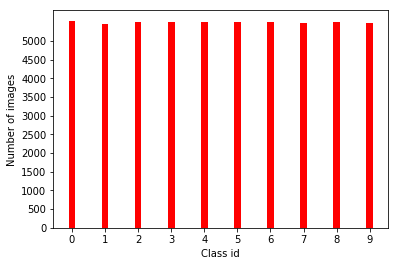

In [17]:
y1, _ = np.histogram(y)
print(y1)
plt.figure()
plt.bar(np.arange(10), y1, width=0.2, color='r')
plt.xlabel("Class id")
plt.ylabel("Number of images")
plt.xticks(np.arange(10))
plt.yticks(np.arange(0, 5500, 500))

In [ ]:
seed_images(X)

In [ ]:
seed_images(X_test)

In [ ]:
fig = plt.figure(figsize=(2, 2))
img = np.reshape(X_test[6], (28, 28))
plt.imshow(img)

In [ ]:
IMG = np.asarray(np.reshape(img, (28, 28)) * 255, dtype=np.uint8)
img_pil = Image.fromarray(IMG)
img_adv = ImageEnhance.Brightness(img_pil).enhance(1.5)
plt.figure()
plt.imshow(img_adv)

In [ ]:
IMG = np.asarray(np.reshape(img, (28, 28)) * 255, dtype=np.uint8)
img_pil = Image.fromarray(IMG)
img_adv = ImageEnhance.Contrast(img_pil).enhance(2.0)
plt.figure()
plt.imshow(img_adv)

In [ ]:
IMG = np.asarray(np.reshape(img, (28, 28)) * 255, dtype=np.uint8)
img_pil = Image.fromarray(IMG)
img_adv = ImageEnhance.Brightness(img_pil).enhance(0.2)
plt.figure()
plt.imshow(img_adv)

In [ ]:
# Training profile
_mean = np.mean(X, axis=(0))
_std = np.std(X, axis=(0))
plt.hist(_mean, bins=50)

In [ ]:
# Validation profile
_mean = np.mean(X_test, axis=(0))
_std = np.std(X_test, axis=(0))
plt.figure()
plt.hist(_mean, bins=50)

In [ ]:
def rand_shift(X):
    datagen = keras.preprocessing.image.ImageDataGenerator(
                                            rotation_range=0,
                                            width_shift_range=3./28,
                                            height_shift_range=3./28,
                                            horizontal_flip=True,
                                            vertical_flip=False)
    datagen.fit(X, augment=True)

    for X_transform in datagen.flow(X, shuffle=False):
        return X_transform

In [ ]:
X_sample = X[np.random.choice(np.shape(X)[0], 32)]
X_sample = np.reshape(X_sample, [-1, 28, 28, 1])
X_sample_transformed = rand_shift(X_sample)


In [ ]:
plot_images(X_sample)

In [ ]:
plot_images(X_sample_transformed)